# Approach

Goal: Find the right combination of data-to-vector methods and topic models to get models that best represent the data.

Text data to vector methods:
* Count Vectorizer: Counts the number of times a word appears in a document.
* Tfidf Vectorizer: Considers the overall document weightage.

Topic models:
* Non-negative Matrix Factorization (NMF)
* Latent Dirichlet Allocation (LDA)

# Import Data and Packages

In [3]:
import pandas as pd 
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.decomposition import TruncatedSVD

In [6]:
# When printing df, display all of the text
pd.set_option("display.max_colwidth", -1)

In [7]:
df = pd.read_csv('cleaned_dataset.csv')

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,text_cleaned,verbs,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat
0,0,0,0,1,37,USA,m,married,y,24h,...,"['wife', 'celebrating', 'year', 'anniversary', 'today']",[celebrating],"[wife, year, anniversary, today]",[wife],[],[celebrating],[anniversary],1,1,1
1,1,1,1,1,37,USA,m,married,y,24h,...,"['mother', 'called', 'blue', 'tell', 'proud']","[called, tell]","[mother, blue]","[mother, she]",[],[called],[me],1,1,1
2,2,2,2,1,37,USA,m,married,y,24h,...,"['today', 'took', 'day', 'time', 'job', 'brunch', 'date', 'wonderful', 'wife']","[took, go, have]","[Today, day, part, time, job, brunch, date, wife]",[i],[],[took],"[day, date]",1,1,1
3,3,3,3,1,37,USA,m,married,y,24h,...,"['just', 'got', 'bonus', 'mturk', 'task']",[got],"[bonus, mturk, task]",[I],[],[got],[bonus],1,1,1
4,4,4,4,1,37,USA,m,married,y,24h,...,"['wife', 'cooked', 'surprise', 'dinner', 'work']","[cooked, take, work]","[wife, surprise, dinner]",[wife],[],[cooked],[dinner],1,1,1


# NMF

In [33]:
def nmf(column, num_categories, vector_type, model_type):
    """
    Input the pre-processed data (column), the number of categories (num_categories),
    the vector type (vector_type, either Tfidf or Count), and the model type."""
    # Vectorize the data
    vectorizer = vector_type
    doc_word = vectorizer.fit_transform(column)
    
    # Instantiate the model
    model = model_type(num_categories)
    doc_topic = model.fit_transform(doc_word)
    
    # Make a list of the words for classifications
    words = vectorizer.get_feature_names()
    t = model.components_.argsort(axis=1)[:,-1:-7:-1]
    topic_words = [[words[e] for e in l] for l in t]
    
    # Print the top words for each topic
    count = 0
    for topic_list in topic_words:
        print('Topic ', count, ': ', *topic_list)
        count += 1

In [31]:
# A list of additional stopper words
extra_stoppers = ['wa', 'able', 'day', 'nice', 'month', 'year', 'today', 'week',
                 'yesterday', 'ha', 'moment', 'life', 'like', 'just', 'lot',
                 'spend', 'spent', 'spending', 'got', 'time']

## Count Vectorizer

In [6]:
# NMF with the count vectorizer using various numbers of topics
nmf(df.text_cleaned, 5, CountVectorizer(stop_words = extra_stoppers), NMF)

print(' ')
nmf(df.text_cleaned, 6, CountVectorizer(stop_words = extra_stoppers), NMF)

print(' ')
nmf(df.text_cleaned, 7, CountVectorizer(stop_words = extra_stoppers), NMF)

Topic  0 :  time family long home make work
Topic  1 :  got work job home finally son
Topic  2 :  friend old best birthday party school
Topic  3 :  new bought car job game house
Topic  4 :  went family movie dinner shopping night
 
Topic  0 :  time family long make home night
Topic  1 :  got job finally son night school
Topic  2 :  friend old best birthday party school
Topic  3 :  new bought car job house game
Topic  4 :  went family movie dinner shopping night
Topic  5 :  work home make came project getting
 
Topic  0 :  time long family movement exam person
Topic  1 :  got job finally promotion free sleep
Topic  2 :  friend best old birthday party met
Topic  3 :  new bought car job game phone
Topic  4 :  went movie shopping temple dinner enjoyed
Topic  5 :  work home project job received early
Topic  6 :  family home make said came son


## Tfidf Vectorizer

In [34]:
# NMF with the the Tfidf Vectorizer, using various numbers of topics
nmf(df.text_cleaned, 5, TfidfVectorizer(stop_words = extra_stoppers), NMF)

print(' ')
nmf(df.text_cleaned, 8, TfidfVectorizer(stop_words = extra_stoppers), NMF)

print(' ')
nmf(df.text_cleaned, 10, TfidfVectorizer(stop_words = extra_stoppers), NMF)

print(' ')
nmf(df.text_cleaned, 17, TfidfVectorizer(stop_words = extra_stoppers), NMF)

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend old best birthday party met
Topic  1 :  work home early project raise promotion
Topic  2 :  went movie shopping temple walk park
Topic  3 :  new bought job car game phone
Topic  4 :  dinner family wife night favorite husband
 


/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend old best met seen long
Topic  1 :  work home early project raise promotion
Topic  2 :  went movie shopping temple walk park
Topic  3 :  new bought car purchased phone house
Topic  4 :  dinner wife night ate husband delicious
Topic  5 :  birthday family party daughter celebrated son
Topic  6 :  game video played playing won dog
Topic  7 :  job interview received getting promotion new
 


/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend best old met seen party
Topic  1 :  work early project raise promotion finished
Topic  2 :  went shopping temple walk park trip
Topic  3 :  new bought car purchased phone house
Topic  4 :  dinner ate night wife favorite delicious
Topic  5 :  birthday family party celebrated gift member
Topic  6 :  home dog came son daughter long
Topic  7 :  job interview received getting promotion new
Topic  8 :  movie watched favorite watching watch tv
Topic  9 :  game video played won playing play
 


/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend best old met seen long
Topic  1 :  work early project raise promotion finished
Topic  2 :  went shopping temple walk trip date
Topic  3 :  new bought car purchased phone house
Topic  4 :  dinner husband delicious ate cooked pizza
Topic  5 :  birthday party celebrated gift surprise celebrate
Topic  6 :  favorite restaurant tv food watched eat
Topic  7 :  job interview received getting promotion new
Topic  8 :  movie watched watch watching saw theater
Topic  9 :  game video played playing won play
Topic  10 :  family member going vacation easter enjoyed
Topic  11 :  dog walk took long park morning
Topic  12 :  night sleep girlfriend hour morning date
Topic  13 :  home came husband visit sister house
Topic  14 :  lunch ate delicious food pizza mother
Topic  15 :  wife love sex baby gave kid
Topic  16 :  daughter son school old morning gave


Topics:

0. Friends
1. Work
2. Going out
3. Buying things
4. Dinner
5. Birthdays
6. Food
7. Getting a Job
8. Movies
9. Games
10. Family
11. Pets/Walks
12. Sleeping
13. Someone Coming Home
14. Lunch
15. Sex
16. Children

In [12]:
# NMF with the the Tfidf Vectorizer, using 25 topics
print(' ')
nmf(df.text_cleaned, 25, TfidfVectorizer(stop_words = extra_stoppers), NMF)

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend best old met seen party
Topic  1 :  work early raise promotion bonus received
Topic  2 :  went shopping temple walk park trip
Topic  3 :  new purchased phone puppy laptop computer
Topic  4 :  dinner delicious cooked ate pizza tonight
Topic  5 :  daughter old school took told play
Topic  6 :  game video played won playing play
Topic  7 :  job interview received promotion raise offer
Topic  8 :  movie watched watching watch tv saw
Topic  9 :  birthday party celebrated surprise gift celebrate
Topic  10 :  family member easter enjoyed vacation trip
Topic  11 :  dog walk took park walked played
Topic  12 :  night sleep hour slept date bed
Topic  13 :  home came visit brought come coming
Topic  14 :  favorite lunch ate restaurant food delicious
Topic  15 :  wife love sex kid baby gave
Topic  16 :  son school old gave hug told
Topic  17 :  girlfriend date met sex love romantic
Topic  18 :  husband took date kid surprised brought
Topic  19 :  long seen havent walk met hadnt


# LDA

## Count Vectorizer

In [8]:
def lda(column, num_categories):
    """
    Input the text data and number of categories.
    Output topics found using LDA topic modeling and
    the top six words for each topic.
    """
    # Vectorize the data. LDA can only use raw term counts for LDA because it is a probabilistic graphical model.
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words=extra_stoppers)
    tf = tf_vectorizer.fit_transform(column)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    # Instantiate the model
    lda = LatentDirichletAllocation(n_components=num_categories, max_iter=5, 
                                    learning_method='online', learning_offset=50.,
                                    random_state=0).fit(tf)
    
    # Print top 6 words for each topic
    for topic_idx, topic in enumerate(lda.components_):
        print("Topic %d:" % (topic_idx), " ".join([tf_feature_names[i] for i in topic.argsort()[:-6 - 1:-1]]))


In [60]:
lda(df.text_cleaned, 10)

Topic 0: work got job finally new car
Topic 1: wife having took lunch boyfriend got
Topic 2: friend birthday went past movie enjoyed
Topic 3: went old event started time child
Topic 4: time dinner family night long food
Topic 5: best won watched said son free
Topic 6: came dog going favorite finished trip
Topic 7: home received ago did sister got
Topic 8: daughter morning school got time make
Topic 9: new game getting love bought watching


# SVD

Trying out using SVD to visualize the NMF topic modeling results. It was unsuccessful. In the future I should try PCA or T-SNE.

In [9]:
X = df.text_cleaned

In [10]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=8, algorithm='randomized', n_iter=100, random_state=122)

# Vectorize the data
vectorizer = TfidfVectorizer(stop_words = extra_stoppers)
X = vectorizer.fit_transform(df.text_cleaned)

# Fit the data
svd_model.fit(X)

8

In [11]:
# Print the topics and their top 9 words
words = vectorizer.get_feature_names()
t = svd_model.components_.argsort(axis=1)[:,-1:-10:-1]
topic_words = [[words[e] for e in l] for l in t]
    
count = 0
for topic_list in topic_words:
    print('Topic ', count, ': ', *topic_list)
    count += 1

Topic  0 :  friend got went new time work dinner family job
Topic  1 :  got work new job car bought promotion raise home
Topic  2 :  went work movie shopping temple wife walk family home
Topic  3 :  new bought went car job movie shopping purchased temple
Topic  4 :  dinner time family wife home husband night bought long
Topic  5 :  got dinner family job night ate wife favorite sleep
Topic  6 :  time long got daughter dog son game finally walk
Topic  7 :  birthday family party celebrated daughter gift son sister mother


## Umap Visualization

In [26]:
# Use umap to visualize the svd categories
import umap.umap_ as umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

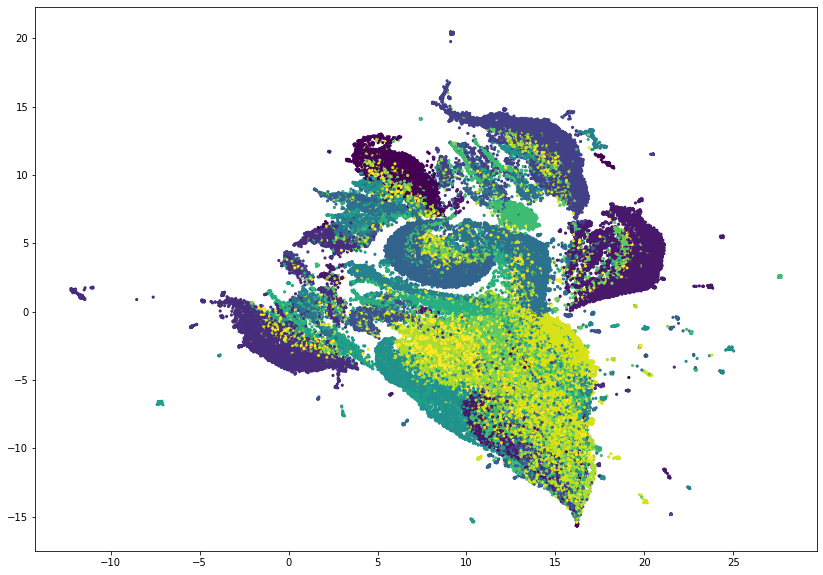

In [30]:
# Plot the SVD categories, for now I'm using colors that correspond to the 
# NMF Tfidf topic modeling since it was my best model.
plt.figure(figsize=(14,10))
plt.scatter(embedding[:, 0], embedding[:, 1], c = df.topic,
s = 10, # size
edgecolor='none'
)
plt.show()

# Nouns

In [27]:
# NMF and Tfidf using just the nouns
nmf(df.nouns, 10, TfidfVectorizer(stop_words = extra_stoppers), NMF)

nmf(df.nouns, 17, TfidfVectorizer(stop_words = extra_stoppers), NMF)

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend years lunch birthday phone while
Topic  1 :  work project raise promotion bonus husband
Topic  2 :  time months girlfriend brother movie quality
Topic  3 :  dinner wife night husband girlfriend restaurant
Topic  4 :  friends birthday party movie game night
Topic  5 :  job interview months promotion offer raise
Topic  6 :  family birthday members vacation trip weekend
Topic  7 :  daughter school birthday morning wife college
Topic  8 :  son morning game dog school months
Topic  9 :  car months money event husband years


/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend years lunch while phone mine
Topic  1 :  work project raise promotion bonus husband
Topic  2 :  time months quality brother years sister
Topic  3 :  dinner husband restaurant pizza food mom
Topic  4 :  friends party school trip lunch weekend
Topic  5 :  job interview months promotion offer raise
Topic  6 :  family members vacation trip weekend home
Topic  7 :  daughter school morning college baby class
Topic  8 :  son school morning months hug birth
Topic  9 :  car months money event husband years
Topic  10 :  dog walk morning park house weather
Topic  11 :  game video team baseball games basketball
Topic  12 :  wife lunch morning sex vacation trip
Topic  13 :  girlfriend date lunch trip months event
Topic  14 :  movie husband theater tv show home
Topic  15 :  birthday party sister gift mom brother
Topic  16 :  night sleep husband bed hours date


# Proto-Agent

In [30]:
# NMF and Tfidf using just the proto-agents
nmf(df.proto_agent, 9, TfidfVectorizer(stop_words = extra_stoppers), NMF)

Topic  0 :  it you they one this members
Topic  1 :  we friend wife husband this who
Topic  2 :  me event this what husband thing
Topic  3 :  that event thing dad you something
Topic  4 :  she friend wife sister who girlfriend
Topic  5 :  he husband friend who boyfriend brother
Topic  6 :  son who him he this you
Topic  7 :  which they who wife husband you
Topic  8 :  daughter who her she daughters kids


For the future, maybe this shouldn't be explored using topic modeling. It might be interesting just to see if the terms 'I' or 'Wife' etc. come up more often in relation to different demographics.

# Further Analysis of Best Model (TFIDF, NMF, 19 Topics)

In [13]:
# I'm not using the function I created so that the variables are global.

# Vectorize the data
vectorizer = TfidfVectorizer(stop_words = extra_stoppers)
doc_word = vectorizer.fit_transform(df.text_cleaned)
    
# Instantiate the model
model = NMF(19)
doc_topic = model.fit_transform(doc_word)
    
# Make a list of the words for classifications
words = vectorizer.get_feature_names()
t = model.components_.argsort(axis=1)[:,-1:-10:-1]
topic_words = [[words[e] for e in l] for l in t]

# Print the topics and their top 9 words.
count = 0
for topic_list in topic_words:
    print('Topic ', count, ': ', *topic_list)
    count += 1

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend best old met seen long talked havent party
Topic  1 :  work early project raise promotion finished bonus received getting
Topic  2 :  went shopping temple walk park trip mall gym date
Topic  3 :  new bought car purchased phone house shoe laptop bike
Topic  4 :  dinner delicious cooked ate pizza tonight having steak restaurant
Topic  5 :  home came visit sister house long brother parent brought
Topic  6 :  game video played won playing play team baseball basketball
Topic  7 :  job interview received getting promotion new offer raise finally
Topic  8 :  movie watched watching watch tv saw theater enjoyed funny
Topic  9 :  birthday party celebrated gift surprise celebrate brother sister mom
Topic  10 :  family member going vacation easter enjoyed trip weekend mother
Topic  11 :  dog walk took long park morning weather outside walked
Topic  12 :  night sleep hour morning slept bed getting woke date
Topic  13 :  wife love sex baby gave kid pregnant told boy
Topic  14 :  f

## Add Topic Labels to DataFrame

In [14]:
# Label each row of the df and save the topic labels in a new row called 'topic'.
df['topic'] = doc_topic.argmax(axis=1)

In [15]:
# Print the the number of rows that each topic was labeled. For example, 15,234
# rows were labeled as topic 15.
df.topic.value_counts().argsort

<bound method Series.argsort of 16    10107
3     8996 
14    7131 
7     7107 
1     7060 
11    6421 
2     5841 
0     5327 
10    5148 
6     5121 
15    4433 
12    4422 
9     4333 
5     3826 
18    3739 
17    3083 
13    3045 
8     2877 
4     1855 
Name: topic, dtype: int64>

In [28]:
# Quick exploration into topics written by women.
df[df['gender'] == 'f'].topic.value_counts().argsort

<bound method Series.argsort of 16    4946
3     3257
18    2957
7     2940
11    2896
14    2774
2     2509
1     2506
15    2470
10    2245
0     2105
9     2049
5     1895
12    1872
6     1393
8     1046
4     818 
17    587 
13    507 
Name: topic, dtype: int64>

## Use Randomized SVD to find 'Elbow'

This was created for the SVD Umap visualization, but wasn't particularly useful.

In [158]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(test_feature_matrix, n_components=15,
                                      n_iter=5,
                                      random_state=None)

In [159]:
Sigma

array([35.50445481, 29.62386121, 26.3151845 , 25.99991012, 24.07654457,
       23.47311347, 23.06206921, 21.30331019, 21.10471776, 20.46450619,
       19.97969227, 19.62768231, 19.46319887, 18.7866036 , 18.46839741])

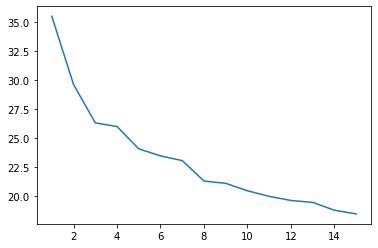

In [160]:
plt.plot(range(1,16),Sigma)
plt.show()

# Print Weight of Each Topic Per Row

In [16]:
test_doc = df.text_cleaned

test_feature_matrix = vectorizer.transform(test_doc)

test_output = model.transform(test_feature_matrix)

# column names
test_topicnames = ['Topic_' + str(i) for i in range(model.n_components)]

# index names
test_docnames = ['Doc_' + str(i) for i in range(len(test_doc))]

# create a dataframe
test_df_document_topic = pd.DataFrame(np.round(test_output,2), columns=test_topicnames, index=test_docnames)

# dominant topic
test_df_document_topic['dominant_topic'] = np.argmax(test_df_document_topic.values, axis=1)
test_df_document_topic.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,dominant_topic
Doc_0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.01,0.0,0.00,0.0,0.09,0.0,0.00,0.00,0.00,0.00,13
Doc_1,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.01,0.01,0.00,0.00,15
Doc_2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.00,0.0,0.02,0.0,0.07,0.0,0.00,0.00,0.01,0.01,13
Doc_3,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1
Doc_4,0.0,0.05,0.0,0.0,0.08,0.0,0.0,0.00,0.0,0.01,0.0,0.00,0.0,0.09,0.0,0.00,0.00,0.00,0.00,13


In [17]:
# Exploring accuracy of labeling for topic 0.
df[df['topic'] == 0][['text', 'topic']]

,text,topic
55,I got a random phone call from a close friend of mine and we scheduled a day to hangout.,0
67,I got to spend the day with my niece that i havent seen in a few months.,0
81,Got to talk with a friend of mine on the phone for at least 20 minutes to catch up.,0
88,I got to play for a few hours online with some of my friends.,0
104,When my friend meet me today with expensive gift for me,0
105,When my friend meet to me after many days and we have enjoyed with them,0
113,when my friends planing a travel in abroad,0
123,When my friends come meet me,0
143,when my college friends going to abroad,0
163,when my friend meet with me from many days,0


In [21]:
def analyze_topics(topic_number, topic_name):
    """ 
    Topic number: integer such as 0,1,2...
    Topic name: string such as Topic_0, Topic_1, ...
    Output the 10 strongest-related and 10 weakest-related
    texts associated with the topic.
    """
    print(topic_name)
    
    # Find the top 10 of those topics
    top_10 = list(test_df_document_topic[test_df_document_topic['dominant_topic'] == topic_number].sort_values(by = topic_name, ascending=False).head(10).index)
    
    # Remove the 'Doc_' part of each string
    top_10 = [i[4:] for i in top_10]

    # Print the top 10 topic sentences
    print("Top 10: ")
    for item in top_10:
        print(df.iloc[int(item)]['text'])
    print(' ')
    
    # Find the last 10 of those topics
    last_10 = list(test_df_document_topic[test_df_document_topic['dominant_topic'] == topic_number].sort_values(by = topic_name, ascending=False).tail(10).index)

    # Remove the 'Doc_' part of each string
    last_10 = [i[4:] for i in last_10]
    
    # Print the top 10 topic sentences
    print("Last 10: ")
    for item in last_10:
        print(df.iloc[int(item)]['text'])
    print(' ')


In [27]:
# Topic 0
analyze_topics(0, 'Topic_0')

# Topic 1
analyze_topics(1, 'Topic_1')

# Topic 2
analyze_topics(2, 'Topic_2')

# Topic 3
analyze_topics(3, 'Topic_3')

# Topic 4
analyze_topics(4, 'Topic_4')

# Topic 5
analyze_topics(5, 'Topic_5')

# Topic 6
analyze_topics(6, 'Topic_6')

# Topic 7
analyze_topics(7, 'Topic_7')

# Topic 8
analyze_topics(8, 'Topic_8')

# Topic 9
analyze_topics(9, 'Topic_9')

# Topic 10
analyze_topics(10, 'Topic_10')

# Topic 11
analyze_topics(11, 'Topic_11')

# Topic 12
analyze_topics(12, 'Topic_12')

# Topic 13
analyze_topics(13, 'Topic_13')

# Topic 14
analyze_topics(14, 'Topic_14')

# Topic 15
analyze_topics(15, 'Topic_15')

# Topic 16
analyze_topics(16, 'Topic_16')

# Topic 17
analyze_topics(17, 'Topic_17')

# Topic 18
analyze_topics(18, 'Topic_18')

Topic_0
Top 10: 
I had friends over.
I got to see one of my friends.
I spent time with a good friend.
I got a call from a friend. It made my day.
I SPEND MOST OF TIMES WITH MY FRIEND
I was able to spend some time with friends
I spent time with a friend
I got to spend the day with my friend 
Had a good friend over.
SPENDING DAY WITH FRIENDS
 
Last 10: 
Life is full of good and bad moments. Each day in itself brings various moments in life. Every day we go through mixed feelings. Sometimes, only we have experienced a pure jovial moment or a pure sad moment. Everyone also has the special moment in life. It is just a day when someones dreams are bad. One day while I was walking on the road, I saw a poor woman who is feeding other poor boy. I was very much happy with that woman.
I got a phone call today scheduling surgery that I greatly need.
Recently I published a Research article In Scopus. As that was my first achievement, I felt very happy and it made me realize how the research has to 

The day with my wife
The day with my wife
My wife was happy with me.
The day with my wife
The day with my wife
The day with my wife
 
Last 10: 
I never knew how much I would love soa
Seeing a 3D ultrasound of my baby at 37 weeks made me happy. 
Well , finding out that we were excepting another baby  boy , brought happy tears in our eye 
The day I found out that I was pregnant with twins.
I got pregnant! 
I could have a little for my baby girl
My niece gave birth to a beautiful baby boy. She had been trying for years and also had a few miscarriages. I'm so happy for her.
I had sex last week with a girl I have been dating 
I found out about this cinnamon coffee that I really love.
I was reminded of a song that I love by Snow Patrol. I forgot about that song and I'm happy I remember it now.
 
Topic_14
Top 10: 
I ate lunch at my favorite restaurant
I got to have my favorite lunch
I ate my favorite food from my favorite restaurant.
I was able to go to my favorite restaurant for lunch.
I ate

# Exploring why some are categorized incorrectly

In [23]:
# Picking a strange text classified as the husband topic.
df[df['text'] == 'I had some good coffee.']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,verbs,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat,topic
38346,38346,38514,38515,726,25,USA,o,single,n,24h,...,[had],[coffee],[I],[],[had],[coffee],0,2,3,18


In [24]:
# Finding the distribution of probabilities for that text.
test_df_document_topic.iloc[38346]

Topic_0           0.00 
Topic_1           0.00 
Topic_2           0.00 
Topic_3           0.00 
Topic_4           0.00 
Topic_5           0.00 
Topic_6           0.00 
Topic_7           0.00 
Topic_8           0.00 
Topic_9           0.00 
Topic_10          0.00 
Topic_11          0.00 
Topic_12          0.00 
Topic_13          0.00 
Topic_14          0.00 
Topic_15          0.00 
Topic_16          0.00 
Topic_17          0.00 
Topic_18          0.01 
dominant_topic    18.00
Name: Doc_38346, dtype: float64

In [35]:
# Make a list of the words for classifications
words = vectorizer.get_feature_names()
t = model.components_.argsort(axis=1)[:,-1:-20:-1]
topic_words = [[words[e] for e in l] for l in t]
    
# Print the top words for each topic
count = 0
for topic_list in topic_words:
    print('Topic ', count, ': ', *topic_list)
    count += 1

Topic  0 :  friend best old met seen long talked havent party hadnt meet school marriage going close saw fun phone talking
Topic  1 :  work early project raise promotion finished bonus received getting bos hour completed hard leave did working promoted big money
Topic  2 :  went shopping temple walk park trip mall gym date beach vacation run college restaurant eat class movie fun concert
Topic  3 :  new bought car purchased phone house shoe laptop bike computer buy puppy brand apartment tv pair started moved dress
Topic  4 :  dinner delicious cooked ate pizza tonight having steak restaurant mom boyfriend parent chicken enjoyed cook cooking meal eating night
Topic  5 :  home came visit sister house long brother parent brought coming come mother finally town mom cat boyfriend weekend away
Topic  6 :  game video played won playing play team baseball basketball online fun watched soccer watching beat ticket board hour win
Topic  7 :  job interview received getting promotion new offer raise

The text was classified as the husband topic because of the term 'coffee'.